# _Time Series With Deep Learning_

_LSMT Long Short Time Memory: Gelecek zaman serisi, metin serisi tahmin eder._

In [5]:
#pip install tensorflow

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM  # LSTM

# LSTM tabanlı zaman serisi modeli kurmak için gerekli veri işleme, ölçekleme ve derin öğrenme kütüphanelerini içe aktarır.

In [7]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

# Google hisse senedi eğitim verilerini içeren CSV dosyasını DataFrame olarak okur.

In [8]:
df.head()

# Veri setinin ilk 5 satırını görüntüleyerek kolonları ve veri yapısını incelemeyi sağlar.

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
train_set = df.iloc[:, 1:2].values

# Veri setinden yalnızca ilgili sütunu seçerek model eğitiminde kullanılacak sayısal diziye dönüştürür.

In [11]:
sc = MinMaxScaler()

# Verileri 0 ile 1 aralığına ölçeklemek için Min-Max ölçekleyici nesnesi oluşturur.

In [13]:
train_set = sc.fit_transform(train_set)

# Eğitim verilerini Min-Max yöntemiyle 0–1 aralığına normalize eder.

In [14]:
x_train = train_set[0:1257]
y_train = train_set[1:1258]

# Bir önceki günün değerlerini girdi, bir sonraki günün değerlerini çıktı olacak şekilde eğitim verilerini oluşturur.

In [15]:
model = Sequential()
model.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))
model.add(Dense(units=1))

# Tek katmanlı LSTM ağı kurarak zaman serisinden bir sonraki değeri tahmin edecek yapıyı oluşturur.

C:\Users\13tua\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli Adam optimizasyonu ve ortalama kare hata kayıp fonksiyonu ile eğitime hazırlar.

In [17]:
model.fit(x_train, y_train, batch_size=32, epochs=200)

# LSTM modelini belirlenen batch boyutu ve epoch sayısı ile eğitim verisi üzerinde eğitir.

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2051
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1501 
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1152 
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0955 
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0846 
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0792 
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0765 
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0748 
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0735 
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0724 
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0712 
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0701 
Epoch 13/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0689 
Epoch 14/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0677 
Epoch 15/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [19]:
test = pd.read_csv('Google_Stock_Price_Test.csv')

# Google hisse senedi test verilerini içeren CSV dosyasını DataFrame olarak okur.

In [20]:
test = test.iloc[:, 1:2].values

# Test veri setinden yalnızca ilgili fiyat sütununu seçerek sayısal diziye dönüştürür.

In [23]:
test_set = sc.transform(test)

# Test verilerini, eğitim verisiyle aynı ölçekleyici kullanarak normalize eder.

In [24]:
tahmin = model.predict(test_set)

# Eğitilen LSTM modeli ile test verileri için tahmin değerlerini üretir.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


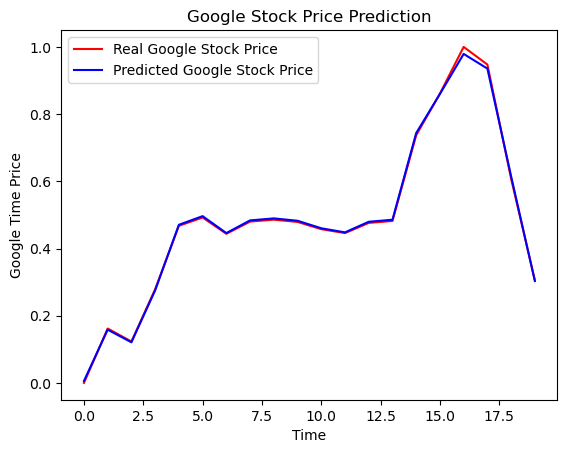

In [25]:
plt.plot(test_set, color='red', label='Real Google Stock Price')
plt.plot(tahmin, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

# Gerçek hisse fiyatları ile LSTM modelinin tahminlerini aynı grafik üzerinde karşılaştırarak model performansını görselleştirir.